## Fine-Tuned Step-Wise Modeling using Train-Test_Split

In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# make a list of new column names that will be better for modeling 
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78','Y1', 'Y2']

# read in the modeling data file and rename the columns
df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f71,f72,f73,f74,f75,f76,f77,f78,Y1,Y2
0,-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,...,0,0,0,0,0,0,0,9.0,0,0
1,-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,...,0,0,0,0,0,0,0,9.0,0,0


In [3]:
# double check the shape of the dataframe
df.shape

(52786, 81)

### Split and Resample Data before Modeling 

In [4]:
# Split data into features and target
# for this modeling approach I will only be using 1 target at a time
# the first target will be Y1 (ACCP)
X = df.iloc[:, :-2] # Features
Y = df.Y1 # Target

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the ACCP target 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Target: Y1 (ACCP)
### 1. Decicion Tree

In [5]:
# build Y1 decision tree 
dt = DecisionTreeClassifier(random_state=2019, max_depth=15)
# fit the model 
dt = dt.fit(X_train_resample,Y_train_resample)
# predict the target for the test data 
Y_pred = dt.predict(X_test)


# print F1 and AUC Scores for Y1 decision tree 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix for the Y1 decision tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9432332704017277
AUC Score: 0.9424558457898735
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5612
           1       0.97      0.94      0.96     10224

    accuracy                           0.94     15836
   macro avg       0.93      0.94      0.94     15836
weighted avg       0.94      0.94      0.94     15836

[[5279  333]
 [ 570 9654]]


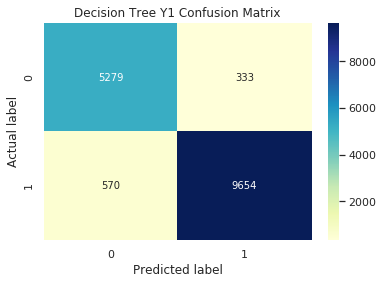

In [6]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Decision Tree Y1 Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/sw_tt_tweaked_dty1_cnfm.PNG')

In [7]:
# define the Y1 decision tree feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
feature_imp[:10]

f13    0.677666
f26    0.231576
f3     0.026280
f2     0.006081
f1     0.005369
f10    0.005300
f0     0.005246
f9     0.004527
f4     0.004059
f25    0.003068
dtype: float64

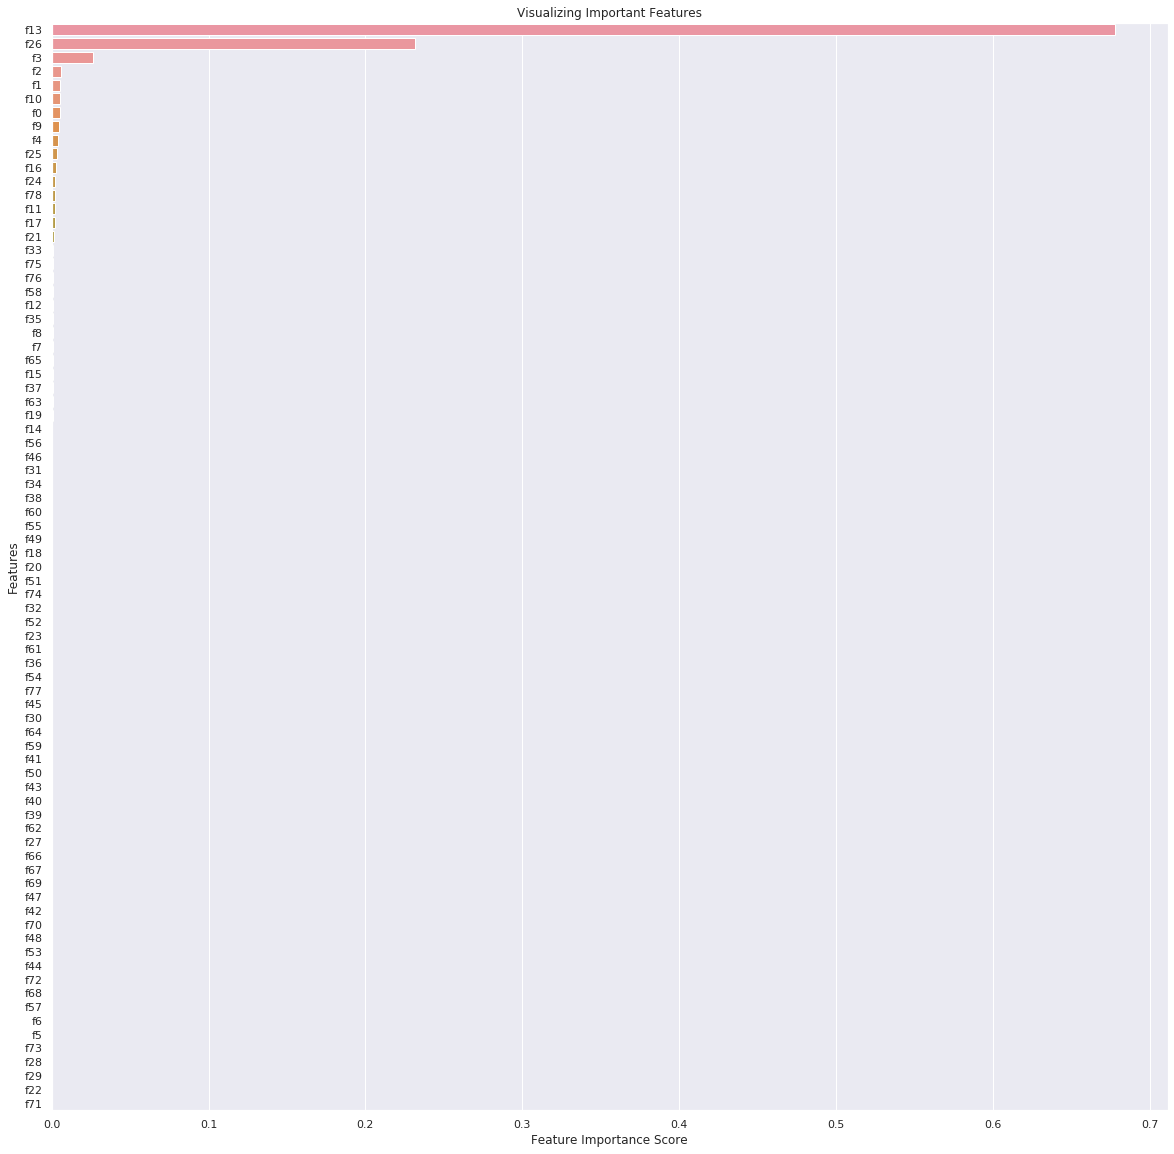

<Figure size 432x288 with 0 Axes>

In [8]:
# visualize the Y1 decision tree feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=feature_imp.index, x=feature_imp)

# Add labels & title 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save figure to a png file 
plt.savefig('images/tweaked_sw_tt_dty1_feature_importance.PNG')

### 3. XGBoost

In [9]:
# build Y1 xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019, max_depth=20)
# fit the model
xg = xg.fit(X_train_resample,Y_train_resample) 
# run the model using test data 
Y_pred=xg.predict(X_test)

# print F1 and AUC scores for the Y1 xgboost model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9503803187368395
AUC Score: 0.9498797150528099
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5612
           1       0.97      0.95      0.96     10224

    accuracy                           0.95     15836
   macro avg       0.94      0.95      0.95     15836
weighted avg       0.95      0.95      0.95     15836

[[5325  287]
 [ 502 9722]]


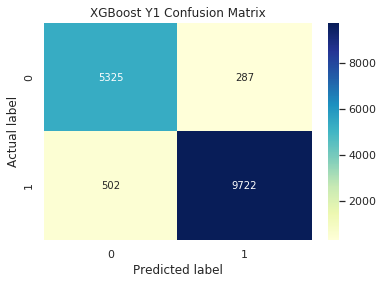

In [10]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('XGBoost Y1 Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/sw_tt_tweaked_xgby1_cnfm.PNG')

In [11]:
# define the Y1 xgboost feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp[:10]

f13    0.911599
f26    0.051113
f78    0.002495
f60    0.002074
f23    0.001854
f31    0.001398
f3     0.001296
f74    0.000983
f10    0.000887
f37    0.000861
dtype: float32

### 7. Random Forest: ACCP (Y1)

In [12]:
# build the Y1 random forest model  
rfy1 = RandomForestClassifier(n_estimators=100, random_state=2019, max_depth=20, min_samples_split=4, max_features=35)
# fit the model 
rfy1 = rfy1.fit(X_train_resample, Y_train_resample)
# Predict the target for the test data 
Y_pred = rfy1.predict(X_test)

# print the F1 and AUC scores for the Y1 random forest model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.9507479493481594
AUC Score: 0.9514505162757649
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5612
           1       0.97      0.95      0.96     10224

    accuracy                           0.95     15836
   macro avg       0.94      0.95      0.95     15836
weighted avg       0.95      0.95      0.95     15836

[[5358  254]
 [ 530 9694]]


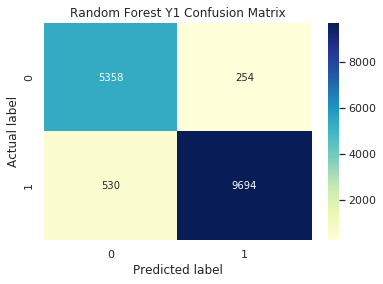

In [13]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Random Forest Y1 Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/sw_tt_tweaked_rfy1_cnfm.PNG')

In [14]:
# define the Y1 random forest feature importance variable
rfy1_feature_imp = pd.Series(rfy1.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
rfy1_feature_imp[:10]

f13    0.509547
f26    0.123721
f78    0.114150
f4     0.057746
f23    0.038343
f3     0.025996
f2     0.020263
f15    0.018197
f1     0.012918
f10    0.009979
dtype: float64

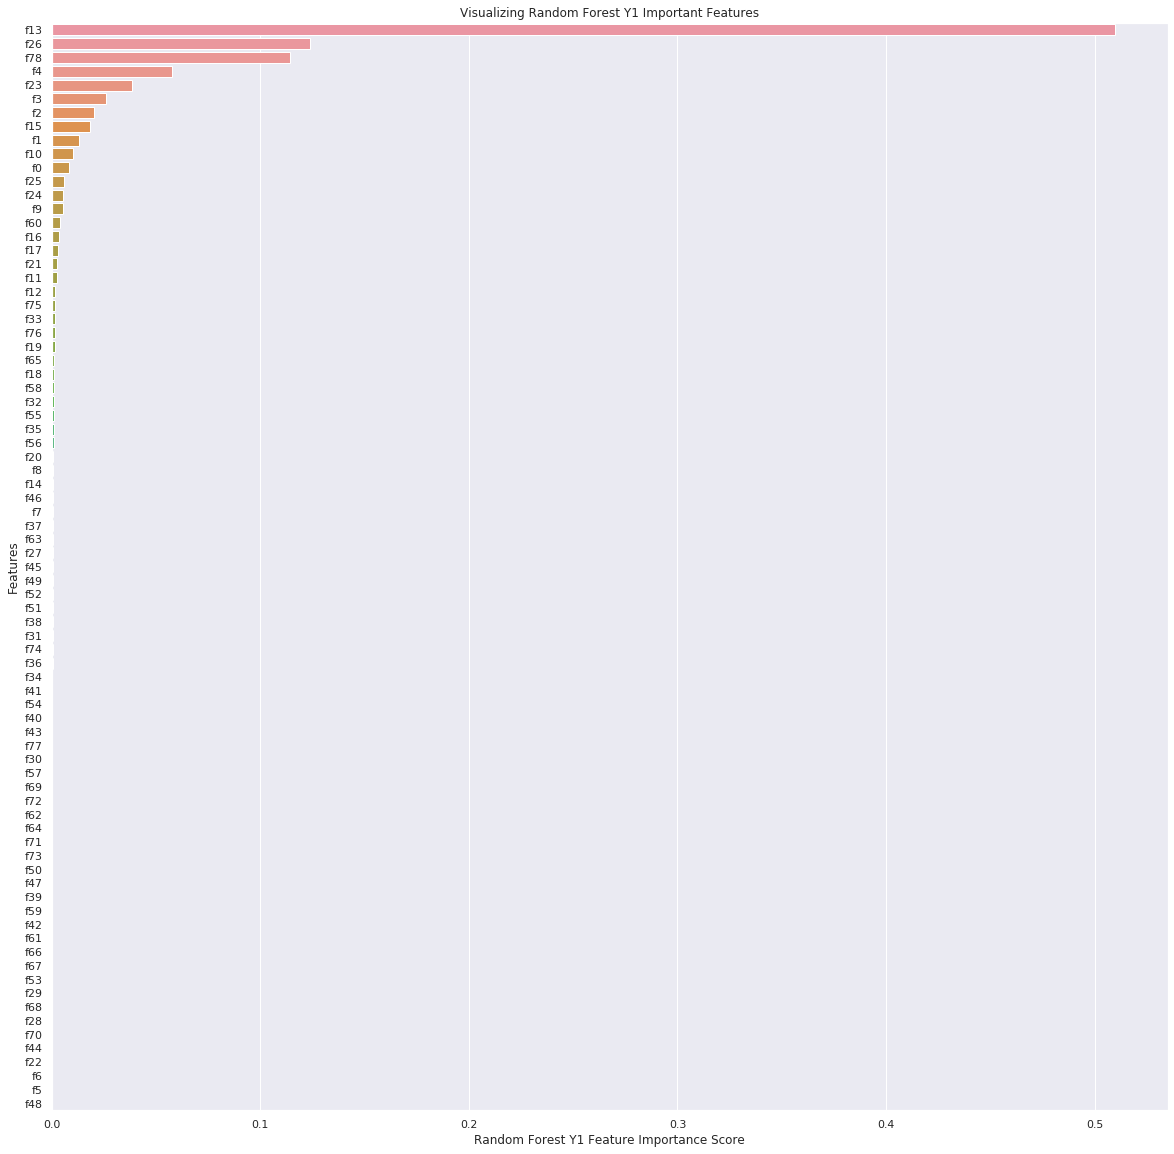

<Figure size 432x288 with 0 Axes>

In [15]:
# visualize the Y1 random forest feature importance values 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=rfy1_feature_imp.index, x=rfy1_feature_imp)

# Add labels & title
plt.xlabel('Random Forest Y1 Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Y1 Important Features")
plt.show()

# save figure to a png file 
plt.savefig('images/tweaked_sw_tt_rfy1_feature_importance.PNG')

## Step-Wise Modeling: CONF

In [16]:
# filter out the students that were not accepted (where ACCP=0)
df = df[df.Y1 != 0]
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f71,f72,f73,f74,f75,f76,f77,f78,Y1,Y2
48,0.649921,-0.010433,-0.018399,-0.018279,0.029160,-0.024231,-0.02066,0.968218,-3.701231,-3.011022,...,0,0,0,0,0,0,0,5.0,1,0
67,-0.018210,-0.010433,-0.018399,-0.018279,-0.156589,-0.024231,-0.02066,2.848948,-2.593895,-3.011022,...,0,0,0,0,0,0,0,5.0,1,0


### Re-Split and Re-Balance the Data

In [17]:
# Split data into features and target
# the second target is Y2 (CONF)
X = df.iloc[:, :-2] # Features
Y = df.Y2 # Target

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the ACCP target 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

### 1. Decision Tree

In [18]:
# build Y2 decision tree 
dt = DecisionTreeClassifier(random_state=2019, max_depth=51)
# fit model 
dt = dt.fit(X_train_resample,Y_train_resample)
# predict the target for the test data 
Y_pred = dt.predict(X_test)

# print F1 and AUC scores for the Y2 decision tree 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix   
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7654879392586731
AUC Score: 0.5484776182393348
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8696
           1       0.22      0.25      0.23      1491

    accuracy                           0.76     10187
   macro avg       0.54      0.55      0.55     10187
weighted avg       0.77      0.76      0.77     10187

[[7352 1344]
 [1116  375]]


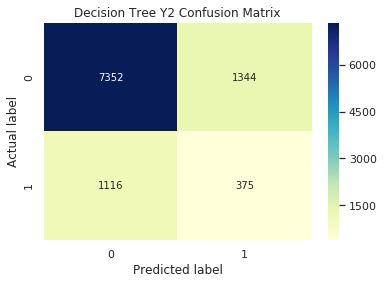

In [19]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Decision Tree Y2 Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/sw_tt_tweaked_dty2_cnfm.PNG')

In [20]:
# define the Y2 decision tree feature importance variable 
feature_imp_conf = pd.Series(dt.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
feature_imp_conf[:10]

f4     0.206420
f78    0.068339
f3     0.065651
f1     0.058765
f0     0.056286
f2     0.052761
f25    0.045558
f24    0.040511
f12    0.026636
f8     0.024096
dtype: float64

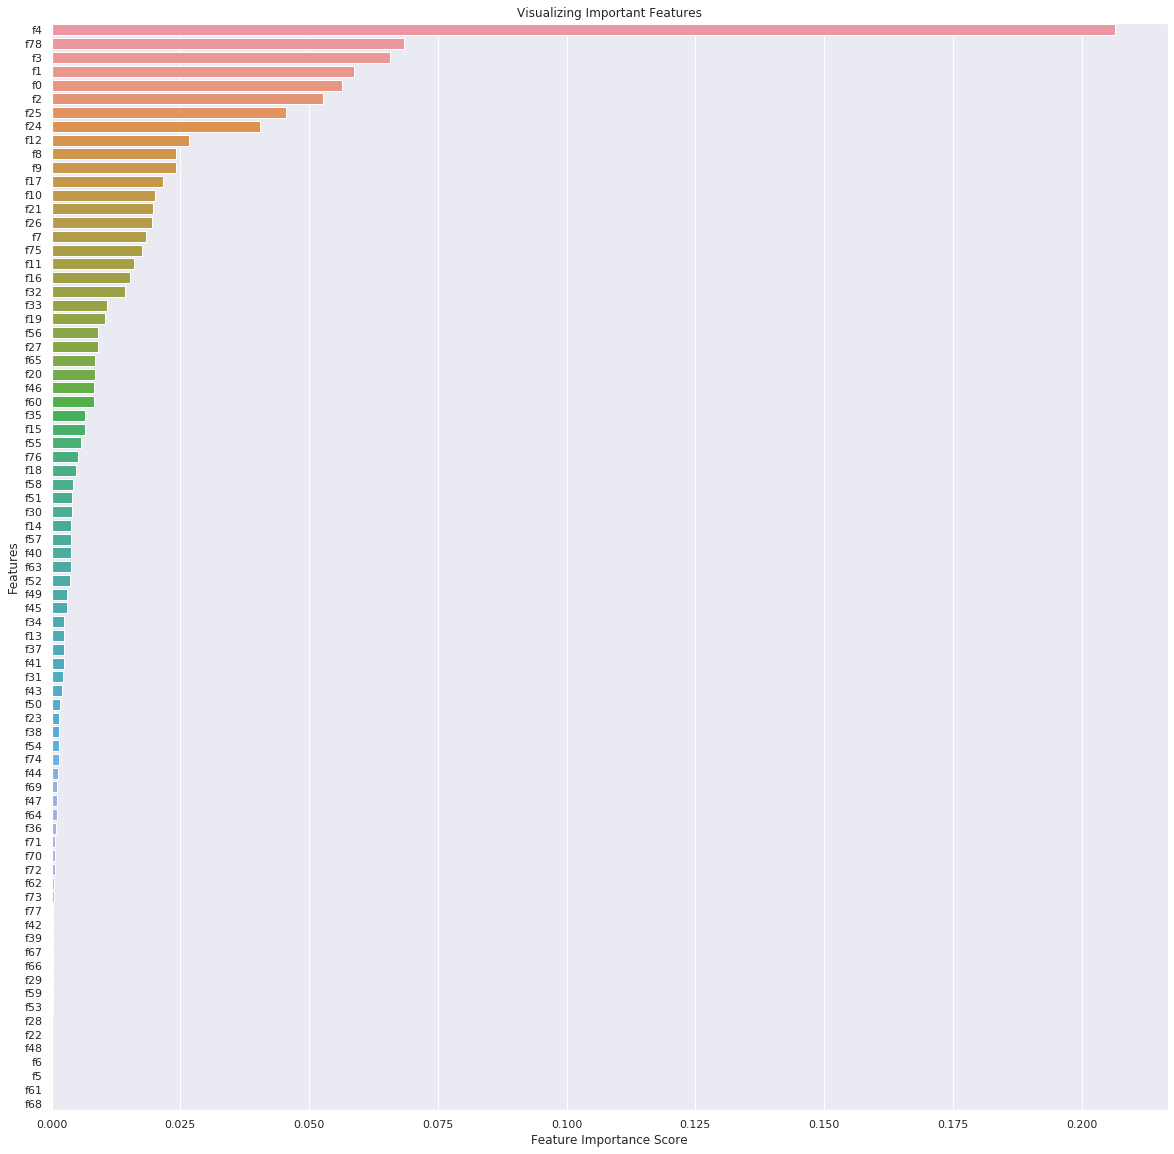

<Figure size 432x288 with 0 Axes>

In [21]:
# visualize the Y2 decision tree feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=feature_imp_conf.index, x=feature_imp_conf)

# Add labels & title 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save figure to png file 
plt.savefig('images/tweaked_sw_tt_dty2_feature_importance.PNG')

### 2. XGBoost

In [22]:
# build Y2 xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019, max_depth=40)
# fit the model
xg = xg.fit(X_train_resample,Y_train_resample) 
# predict target 
Y_pred=xg.predict(X_test)

# print F1 and AUC scores for the Y2 xgboost model
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8001068334370833
AUC Score: 0.5699263427853228
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8696
           1       0.31      0.23      0.26      1491

    accuracy                           0.81     10187
   macro avg       0.59      0.57      0.58     10187
weighted avg       0.79      0.81      0.80     10187

[[7935  761]
 [1152  339]]


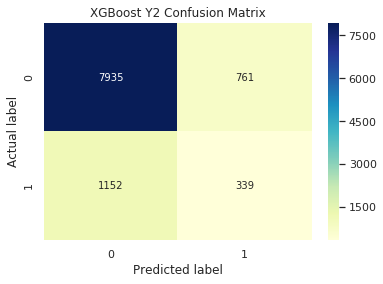

In [23]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('XGBoost Y2 Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/sw_tt_tweaked_xgby2_cnfm.PNG')

In [24]:
# define the Y2 xgboost feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp[:10]

f60    0.073577
f20    0.039301
f21    0.028662
f71    0.025446
f47    0.021681
f70    0.021003
f28    0.020965
f41    0.020965
f68    0.020786
f44    0.017850
dtype: float32

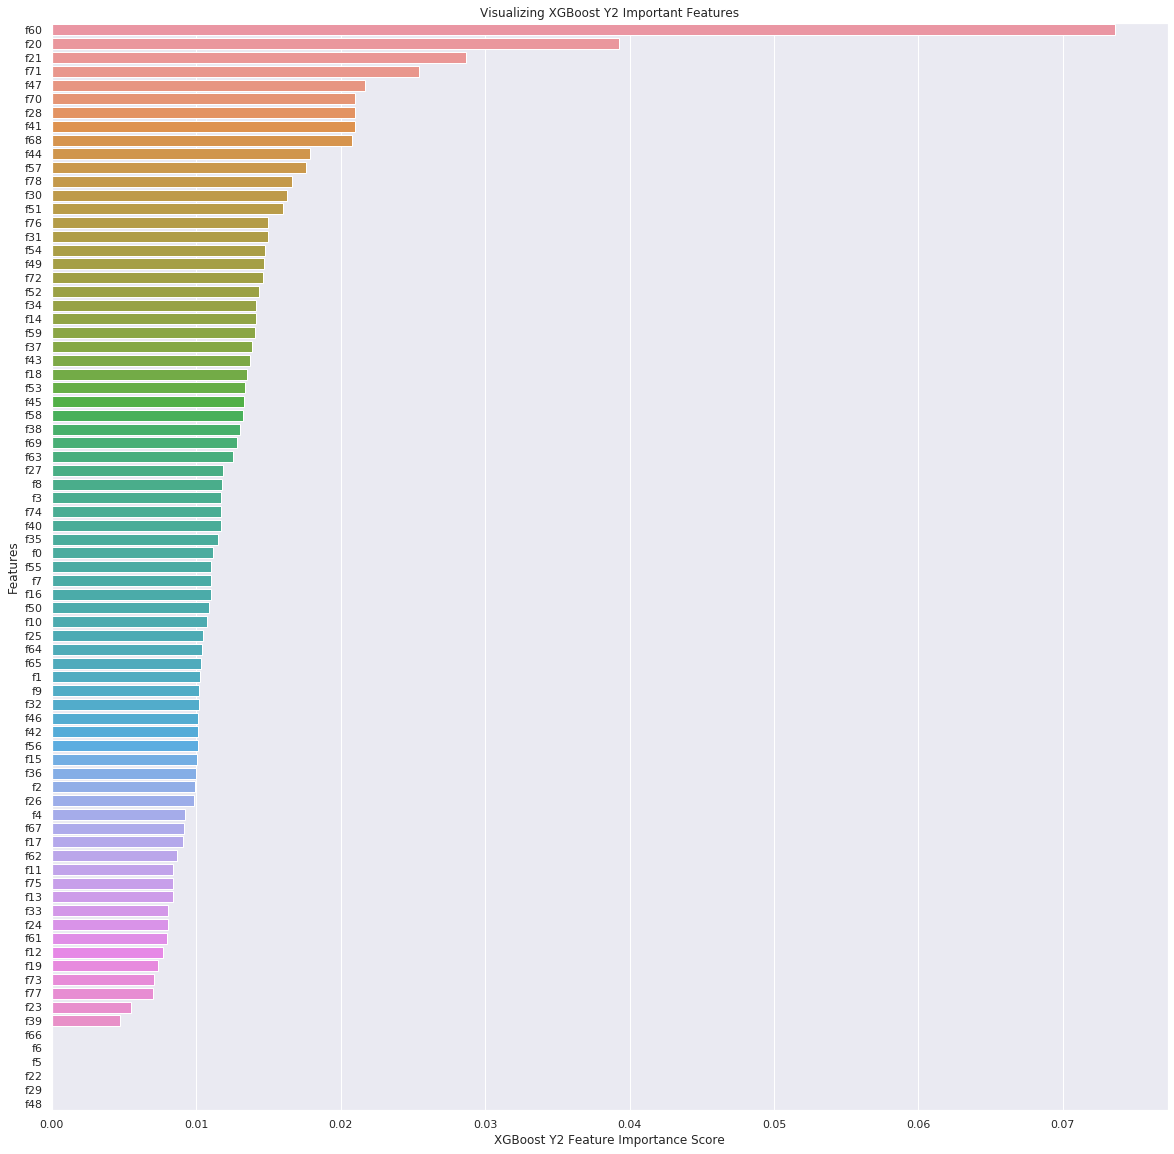

<Figure size 432x288 with 0 Axes>

In [25]:
# visualize the Y2 random forest feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=xgb_feature_imp.index, x=xgb_feature_imp)

# Add labels & title
plt.xlabel('XGBoost Y2 Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing XGBoost Y2 Important Features")
plt.show()

# save figure to a png file 
plt.savefig('images/tweaked_sw_tt_xgby2_feature_importance.PNG')

### 3. Random Forest: CONF (Y2)

In [26]:
# build Y2 random forest model 
rfy2 = RandomForestClassifier(n_estimators=100, random_state=2019, max_depth=55, min_samples_split=4)
# fit model
rfy2 = rfy2.fit(X_train_resample, Y_train_resample)
# predict target 
Y_pred = rfy2.predict(X_test)

# print F1 and AUC scores for the Y2 random forest model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8060691731698424
AUC Score: 0.5683852810206841
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8696
           1       0.34      0.21      0.26      1491

    accuracy                           0.82     10187
   macro avg       0.60      0.57      0.58     10187
weighted avg       0.79      0.82      0.81     10187

[[8089  607]
 [1183  308]]


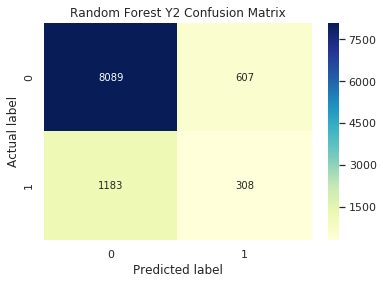

In [27]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Random Forest Y2 Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/sw_tt_tweaked_rfy2_cnfm.PNG')

In [28]:
# define the Y2 random forest feature importance variable
rfy2_feature_imp = pd.Series(rfy2.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
rfy2_feature_imp[:10]

f4     0.182629
f3     0.065986
f78    0.064567
f0     0.061236
f1     0.061107
f2     0.059956
f25    0.046794
f24    0.045551
f12    0.027532
f9     0.027270
dtype: float64

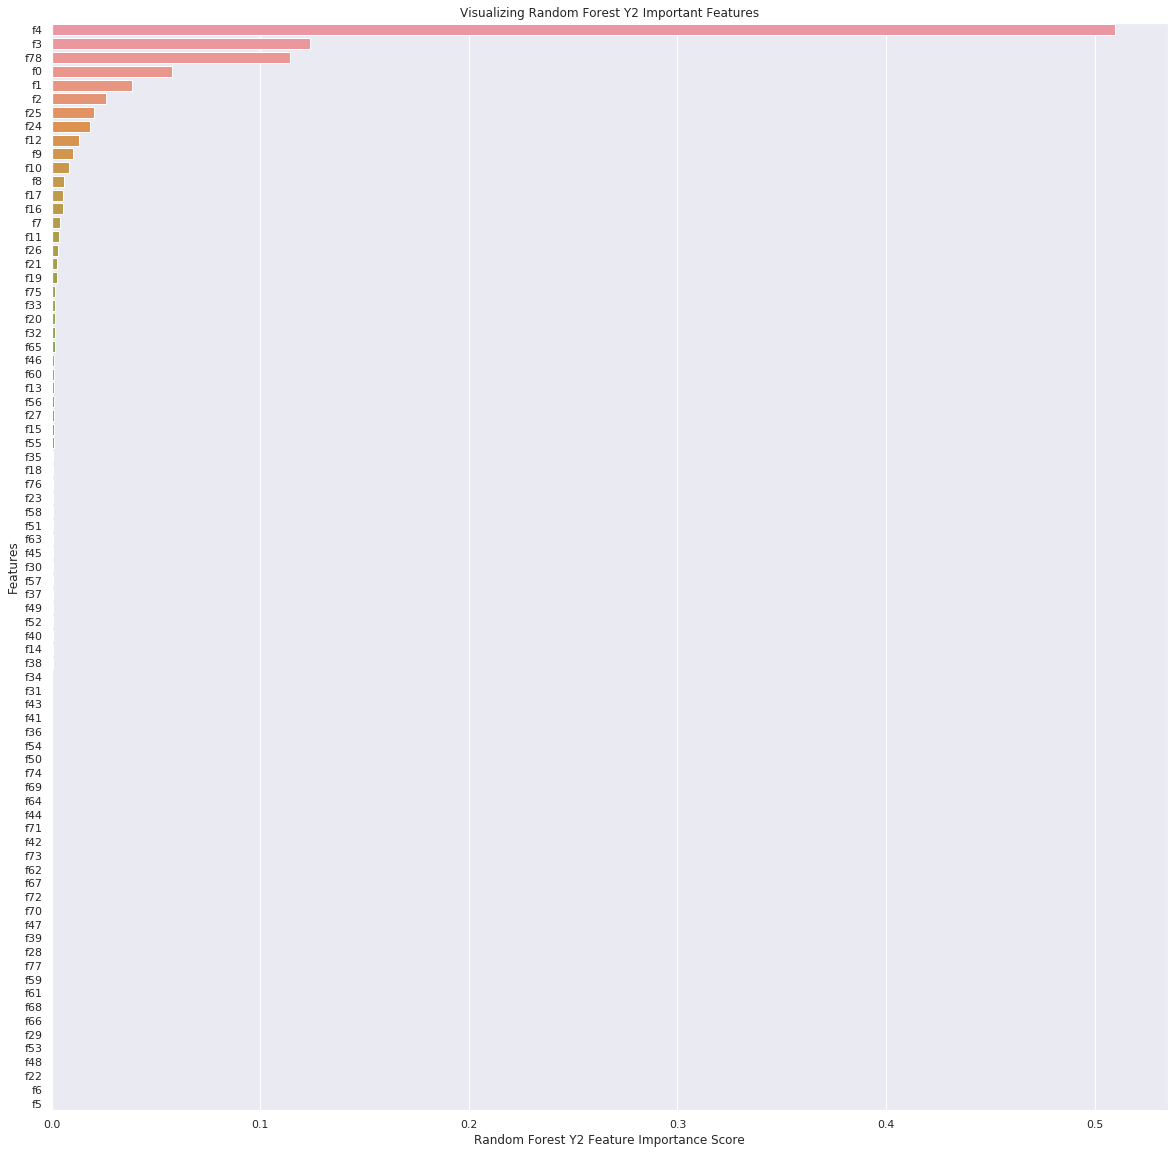

<Figure size 432x288 with 0 Axes>

In [29]:
# visualize the Y2 random forest feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=rfy2_feature_imp.index, x=rfy1_feature_imp)

# Add labels & title
plt.xlabel('Random Forest Y2 Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Y2 Important Features")
plt.show()

# save figure to a png file 
plt.savefig('images/tweaked_sw_tt_rfy2_feature_importance.PNG')